<font size=5>Frequent category imputation

In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv("house.csv")
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
print(df.columns)

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [4]:
df1 = pd.read_csv("house.csv",usecols=['BsmtQual','FireplaceQu','GarageType','SalePrice'])
df1.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice
0,Gd,NaN,Attchd,208500
1,Gd,TA,Attchd,181500
2,Gd,TA,Attchd,223500
3,TA,Gd,Detchd,140000
4,Gd,TA,Attchd,250000


In [5]:
df1.dtypes

BsmtQual       object
FireplaceQu    object
GarageType     object
SalePrice       int64
dtype: object

In [6]:
for feature in df1.columns:
    data = df1.copy()
    print(feature,"has",np.round(data[feature].isnull().mean()*100,4),"% null values")

BsmtQual has 2.5342 % null values
FireplaceQu has 47.2603 % null values
GarageType has 5.5479 % null values
SalePrice has 0.0 % null values


In [7]:
df1.loc[:,"BsmtQual"].value_counts()

TA    649
Gd    618
Ex    121
Fa     35
Name: BsmtQual, dtype: int64

In [8]:
grouping = df1.groupby(['BsmtQual'])
grouping

In [9]:
for i,j in grouping:
    print(i)
    print(j)
    print()

Ex
     BsmtQual FireplaceQu GarageType  SalePrice
6          Ex          Gd     Attchd     307000
11         Ex          Gd    BuiltIn     345000
20         Ex          Gd    BuiltIn     325300
27         Ex          Gd     Attchd     306000
32         Ex         NaN     Attchd     179900
...       ...         ...        ...        ...
1388       Ex          Gd     Attchd     377500
1405       Ex          Gd     Attchd     275000
1437       Ex          Gd     Attchd     394617
1440       Ex          Gd     Detchd     191000
1442       Ex          Ex     Attchd     310000

[121 rows x 4 columns]

Fa
     BsmtQual FireplaceQu GarageType  SalePrice
74         Fa         NaN     Detchd     107400
106        Fa         NaN     Detchd     100000
181        Fa          Gd     Detchd     200100
184        Fa         NaN     Attchd     127000
187        Fa         NaN     Detchd     135000
202        Fa         NaN     Attchd     112000
246        Fa         NaN     Detchd     137000
264      

In [10]:
grouping.get_group('TA')

,BsmtQual,FireplaceQu,GarageType,SalePrice
3,TA,Gd,Detchd,140000
8,TA,TA,Detchd,129900
9,TA,TA,Attchd,118000
10,TA,NaN,Detchd,129500
12,TA,NaN,Detchd,144000
...,...,...,...,...
1445,TA,NaN,Detchd,129000
1446,TA,NaN,Attchd,157900
1457,TA,Gd,Attchd,266500
1458,TA,NaN,Attchd,142125


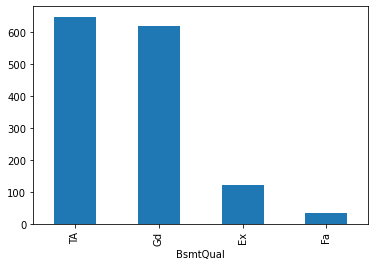

In [11]:
df1.groupby(['BsmtQual'])['BsmtQual'].count().sort_values(ascending=False).plot.bar()

In [12]:
df1.groupby(['GarageType'])['GarageType'].count().sort_values(ascending=False)

GarageType
Attchd     870
Detchd     387
BuiltIn     88
Basment     19
CarPort      9
2Types       6
Name: GarageType, dtype: int64

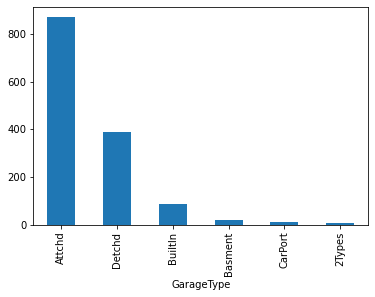

In [13]:
df1.groupby(['GarageType'])['GarageType'].count().sort_values(ascending=False).plot.bar()

In [14]:
df1.groupby(['FireplaceQu'])['FireplaceQu'].count().sort_values(ascending=False)

FireplaceQu
Gd    380
TA    313
Fa     33
Ex     24
Po     20
Name: FireplaceQu, dtype: int64

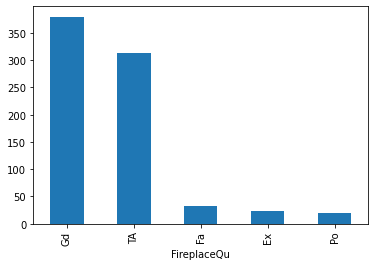

In [15]:
df1.groupby(['FireplaceQu'])['FireplaceQu'].count().sort_values(ascending=False).plot.bar()

In [16]:
df1["BsmtQual"].value_counts()

TA    649
Gd    618
Ex    121
Fa     35
Name: BsmtQual, dtype: int64

In [17]:
df1["BsmtQual"].value_counts().index

Index(['TA', 'Gd', 'Ex', 'Fa'], dtype='object')

In [18]:
def inpute_nan(data,variable):
    value = data[variable].value_counts().index[0]
    data[variable].fillna(value,inplace=True)

In [19]:
df1.columns

Index(['BsmtQual', 'FireplaceQu', 'GarageType', 'SalePrice'], dtype='object')

In [20]:
for feature in df1.columns:
    if feature in ['BsmtQual', 'FireplaceQu', 'GarageType']:
        inpute_nan(df1,feature)

In [21]:
df1.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice
0,Gd,Gd,Attchd,208500
1,Gd,TA,Attchd,181500
2,Gd,TA,Attchd,223500
3,TA,Gd,Detchd,140000
4,Gd,TA,Attchd,250000


In [22]:
df1.isnull().sum()

BsmtQual       0
FireplaceQu    0
GarageType     0
SalePrice      0
dtype: int64

<font size=5>adding a new feature to capture nan

In [37]:
import numpy as np
import pandas as pd

In [38]:
df2 = pd.read_csv("house.csv",usecols=['BsmtQual','FireplaceQu','GarageType','SalePrice'])
df2.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice
0,Gd,NaN,Attchd,208500
1,Gd,TA,Attchd,181500
2,Gd,TA,Attchd,223500
3,TA,Gd,Detchd,140000
4,Gd,TA,Attchd,250000


In [39]:
df2.isnull().sum()

BsmtQual        37
FireplaceQu    690
GarageType      81
SalePrice        0
dtype: int64

In [40]:
def inpute_nan(data,variable):
    value = data[variable].mode()[0]
    data[variable+"_new"] = np.where(data[variable].isnull(),0,1)
    data[variable].fillna(value,inplace=True)

In [41]:
for feature in df2.columns:
    inpute_nan(df2,feature)

In [42]:
df2.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice,BsmtQual_new,FireplaceQu_new,GarageType_new,SalePrice_new
0,Gd,Gd,Attchd,208500,1,0,1,1
1,Gd,TA,Attchd,181500,1,1,1,1
2,Gd,TA,Attchd,223500,1,1,1,1
3,TA,Gd,Detchd,140000,1,1,1,1
4,Gd,TA,Attchd,250000,1,1,1,1


In [44]:
df2.isnull().sum()

BsmtQual           0
FireplaceQu        0
GarageType         0
SalePrice          0
BsmtQual_new       0
FireplaceQu_new    0
GarageType_new     0
SalePrice_new      0
dtype: int64

<font size=5>replacing with a new category

In [45]:
import numpy as np
import pandas as pd

In [46]:
df3 = pd.read_csv("house.csv",usecols=['BsmtQual','FireplaceQu','GarageType','SalePrice'])
df3.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice
0,Gd,NaN,Attchd,208500
1,Gd,TA,Attchd,181500
2,Gd,TA,Attchd,223500
3,TA,Gd,Detchd,140000
4,Gd,TA,Attchd,250000


In [47]:
df3.isnull().sum()

BsmtQual        37
FireplaceQu    690
GarageType      81
SalePrice        0
dtype: int64

In [48]:
def inpute_nan(data,variable):
    data[variable+"_new"] = np.where(data[variable].isnull(),"Missing",df[variable])

In [49]:
for feature in df3.columns:
    inpute_nan(df3,feature)

In [50]:
df3.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice,BsmtQual_new,FireplaceQu_new,GarageType_new,SalePrice_new
0,Gd,NaN,Attchd,208500,Gd,Missing,Attchd,208500
1,Gd,TA,Attchd,181500,Gd,TA,Attchd,181500
2,Gd,TA,Attchd,223500,Gd,TA,Attchd,223500
3,TA,Gd,Detchd,140000,TA,Gd,Detchd,140000
4,Gd,TA,Attchd,250000,Gd,TA,Attchd,250000


In [51]:
df3.drop(["BsmtQual","FireplaceQu","GarageType"],axis=1,inplace=True)

In [52]:
df3.head()

,SalePrice,BsmtQual_new,FireplaceQu_new,GarageType_new,SalePrice_new
0,208500,Gd,Missing,Attchd,208500
1,181500,Gd,TA,Attchd,181500
2,223500,Gd,TA,Attchd,223500
3,140000,TA,Gd,Detchd,140000
4,250000,Gd,TA,Attchd,250000


In [53]:
df3.isnull().sum()

SalePrice          0
BsmtQual_new       0
FireplaceQu_new    0
GarageType_new     0
SalePrice_new      0
dtype: int64

In [1]:
import pandas as pd
import numpy as np

In [2]:
df4 = pd.read_csv("train.csv",usecols=["X1","X2","X3","X4","X5","X6"])
df4.head()

,X1,X2,X3,X4,X5,X6
0,v,at,a,d,u,j
1,t,av,e,d,y,l
2,w,n,c,d,x,j
3,t,n,f,d,x,l
4,v,n,f,d,h,d


In [3]:
df4.isnull().sum()

X1    0
X2    0
X3    0
X4    0
X5    0
X6    0
dtype: int64

In [9]:
list1 = df4.X1.value_counts().sort_values(ascending=False).head(10).index

In [12]:
value = list(list1)
value

['aa', 's', 'b', 'l', 'v', 'r', 'i', 'a', 'c', 'o']

In [39]:
def top_10(data,variable):
    
    variable = df4[variable].value_counts().sort_values(ascending=False).head(10).index
    print(variable)
    

In [40]:
for feature in df4.columns:
    top_10(df4,feature)

Index(['aa', 's', 'b', 'l', 'v', 'r', 'i', 'a', 'c', 'o'], dtype='object')
Index(['as', 'ae', 'ai', 'm', 'ak', 'r', 'n', 's', 'f', 'e'], dtype='object')
Index(['c', 'f', 'a', 'd', 'g', 'e', 'b'], dtype='object')
Index(['d', 'a', 'b', 'c'], dtype='object')
Index(['v', 'w', 'q', 'r', 's', 'd', 'n', 'm', 'p', 'i'], dtype='object')
Index(['g', 'j', 'd', 'i', 'l', 'a', 'h', 'k', 'c', 'b'], dtype='object')


In [41]:
top_10_x1 =['aa', 's', 'b', 'l', 'v', 'r', 'i', 'a', 'c', 'o'] 
top_10_x2 = ['as', 'ae', 'ai', 'm', 'ak', 'r', 'n', 's', 'f', 'e']
top_10_x3 = ['c', 'f', 'a', 'd', 'g', 'e', 'b']
top_10_x4 = ['d', 'a', 'b', 'c']
top_10_x4 = ['v', 'w', 'q', 'r', 's', 'd', 'n', 'm', 'p', 'i']
top_10_x6 = ['g', 'j', 'd', 'i', 'l', 'a', 'h', 'k', 'c', 'b']

In [55]:
def one_hot(data,variable,value):
    for feature in value:
        data[feature] = np.where(data[variable]==feature,1,0)

In [56]:
one_hot(df4,'X1',top_10_x1)

In [57]:
df4.head()

,X1,X2,X3,X4,X5,X6,aa,s,b,l,v,r,i,a,c,o
0,v,at,a,d,u,j,0,0,0,0,1,0,0,0,0,0
1,t,av,e,d,y,l,0,0,0,0,0,0,0,0,0,0
2,w,n,c,d,x,j,0,0,0,0,0,0,0,0,0,0
3,t,n,f,d,x,l,0,0,0,0,0,0,0,0,0,0
4,v,n,f,d,h,d,0,0,0,0,1,0,0,0,0,0


In [58]:
one_hot(df4,'X1',top_10_x2)

In [59]:
df4.head()

,X1,X2,X3,X4,X5,X6,aa,s,b,l,...,c,o,as,ae,ai,m,ak,n,f,e
0,v,at,a,d,u,j,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,t,av,e,d,y,l,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,w,n,c,d,x,j,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,t,n,f,d,x,l,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,v,n,f,d,h,d,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
